<h2 style="text-align:center;">Support Vector Regression (SVR)</h2>

---

## 📌 Introduction
So far, we have seen **Linear Regression** and **Polynomial Regression**.  
Both approaches try to fit a curve to the data points.  

However, sometimes the data is **non-linear and noisy**, and simple curve-fitting may not generalize well.  
This is where **Support Vector Regression (SVR)** comes in.  

SVR is the regression counterpart of **Support Vector Machines (SVM)**.  
It is used when the **dependent variable is continuous**, and it tries to fit the best function within a defined margin of tolerance.

---

## 📌 SVR Theory (Simplified)

- **Hyperplane**:  
  In SVR, the regression line is called a *hyperplane*.  
  It is chosen so that most data points lie within a margin of tolerance.

- **Epsilon (ε-insensitive tube)**:  
  SVR does not try to predict every point exactly.  
  Instead, it allows a margin (epsilon) within which errors are ignored.  
  Only points outside this tube influence the model.

- **Support Vectors**:  
  The data points that fall outside the epsilon tube.  
  These points "support" the hyperplane and affect the prediction.

- **Kernel Trick**:  
  SVR can use kernels to handle **non-linear relationships**.  
  - `linear`: straight line regression  
  - `poly`: polynomial relationship  
  - `rbf`: radial basis function (captures complex curves)  
  - `sigmoid`: less commonly used  

---

## 📌 Key Advantages
- Works well for **non-linear regression problems**.  
- Robust to outliers (since only support vectors matter).  
- Provides flexibility with kernel functions.  

---


<h2 style="text-align:center;">SVR Practical Implementation</h2>


In [1]:
# ----------------------------------------------------
# 📌 Importing Required Libraries
# ----------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### 📂 Load Dataset
We will use the same **Employee Salary Dataset (emp_sal.csv)** used for Polynomial Regression.


In [2]:
# Load dataset
df = pd.read_csv("../data/emp_sal.csv")

# Features (Position Level) & Target (Salary)
X = df.iloc[:, 1:2].values   # Independent variable (Position Level)
y = df.iloc[:, 2].values     # Dependent variable (Salary)

df.head()


,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000


### ⚡ Feature Scaling
SVR is sensitive to the scale of data.  
So, we apply **StandardScaler** to both `X` and `y`.


In [3]:
# Scaling features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1,1))   # reshape y into 2D



### ⚡ Train SVR Model
We will use:
- **Kernel = polynomial (degree 5)** for a smooth non-linear curve.


In [4]:
# SVR with RBF Kernel
svr_regressor = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.1)
svr_regressor.fit(X_scaled, y_scaled.ravel())


SVR(C=100, gamma=0.1)

### 🎯 Prediction Example
Predict salary for **Position Level = 6.5**.


In [5]:
# Predict at Position Level = 6.5
scaled_input = scaler_X.transform([[6.5]])
scaled_pred = svr_regressor.predict(scaled_input)

# Inverse transform back to original scale
final_pred = scaler_y.inverse_transform(scaled_pred.reshape(-1,1))

print(f"SVR Prediction at 6.5: {final_pred[0][0]:.2f}")


SVR Prediction at 6.5: 156539.38


### 📊 Visualization
Plot SVR predictions against original data.


C:\Users\MUBASSHIR\AppData\Local\Temp\ipykernel_1364\4223352572.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1,1)


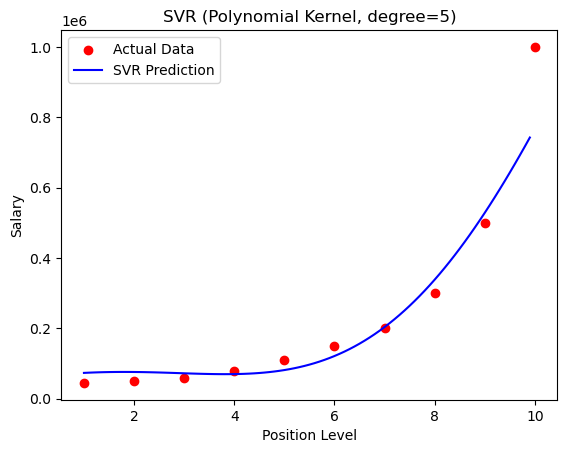

In [6]:
# Create smooth curve for plotting
X_grid = np.arange(min(X), max(X), 0.1).reshape(-1,1)
X_grid_scaled = scaler_X.transform(X_grid)

y_pred_scaled = svr_regressor.predict(X_grid_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))

# Scatter original data
plt.scatter(X, y, color='red', label="Actual Data")

# SVR curve
plt.plot(X_grid, y_pred, color='blue', label="SVR Prediction")

plt.title("SVR (Polynomial Kernel, degree=5)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()
plt.show()


### 📈 Model Evaluation (R² Score)


In [7]:
# Evaluate R² Score
y_train_pred_scaled = svr_regressor.predict(X_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1,1))

r2 = r2_score(y, y_train_pred)
print(f"SVR Model R² Score: {r2:.4f}")


SVR Model R² Score: 0.9265


In [9]:
# ➤ Save trained SVR model + scalers into a pickle file

import pickle

# Bundle everything we need for prediction
model_bundle = {
    "scaler_X": scaler_X,
    "scaler_y": scaler_y,
    "svr_model": svr_regressor
}

# Save in models folder
with open("../models/svr_model.pkl", "wb") as f:
    pickle.dump(model_bundle, f)

print("✅ SVR model and scalers saved successfully!")


✅ SVR model and scalers saved successfully!
